In [2]:
import numpy as np

class KNNClassifier:
    def __init__(self, n_neighbours=3) -> None:
        self.n_neighbours = n_neighbours
        
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        
    def predict(self, x_test):
        predictions = []
        for x in x_test:
            distances = []
            for i, x_train in enumerate(self.x):
                dist = np.sqrt(np.sum((x-x_train)**2))
                distances.append((i, dist))
            distances.sort(key = lambda x: x[1])
            k_nearest = [self.y[i] for i, _ in distances[:self.n_neighbours]]
            pred = max(set(k_nearest), key = k_nearest.count)
            predictions.append(pred)
        return predictions

In [3]:
import pandas as pd
df = pd.read_csv('diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [4]:
df.dropna()
df= df[np.isfinite(df).all(1)]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,21,28,0,123,344,29,1
1,1,23,18,22,0,62,195,10,0
2,8,121,16,0,0,30,362,11,1
3,1,27,18,16,61,77,53,0,0
6,3,16,7,25,56,103,117,5,1


In [8]:
x = df.iloc[:,[0,1,2,3,4,5,6,7]].values
y = df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
knn = KNNClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.7248322147651006
[[85 15]
 [26 23]]


<AxesSubplot:>

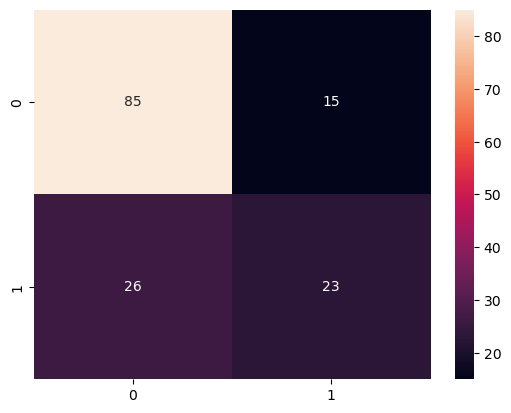

In [12]:
import seaborn as sns
sns.heatmap(cm, annot = True)